In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.dates as mdates

In [84]:
df_gold = pd.read_csv('gold_clean.csv',index_col=0)
df_gold["Date"] = pd.to_datetime(df_gold["Date"])
df_gold.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.5,280.0,283.7,21621,USD
1,2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2,2000-01-06,281.6,282.8,280.2,282.4,19055,USD
3,2000-01-07,282.5,284.5,282.0,282.9,11266,USD
4,2000-01-10,282.4,283.9,281.8,282.7,30603,USD


## 1. Trực quan hoá và đưa ra phân tích.

### 1.1  Quan sát sự chênh lệch giữa giá cao nhất và thấp nhất trong ngày.


**Mục đích đề xuất ý tưởng:** Tìm hiểu, quan sát và nhận xét về sự chênh lệch giữa giá cao nhất và thấp nhất trong ngày.

**Các trường dữ liệu liên quan:** High, Low.

**Biểu đồ biểu diễn và tính phù hợp của biểu đồ với các trường dữ liệu:**<br>
Biểu đồ được sử dụng để trực quan là **Scatter**.<br>
Tính phù hợp của biểu đồ với các trường dữ liệu được ở chổ:
-   Thể hiện sự phân tán độ chênh lệch của giá cao nhất và thấp nhất.   
-   Dễ dàng quan sát được các chênh lệch cao nhất và đưa ra nhận xét.
-   Đơn giản, trực quan với lượng dữ liệu lớn.

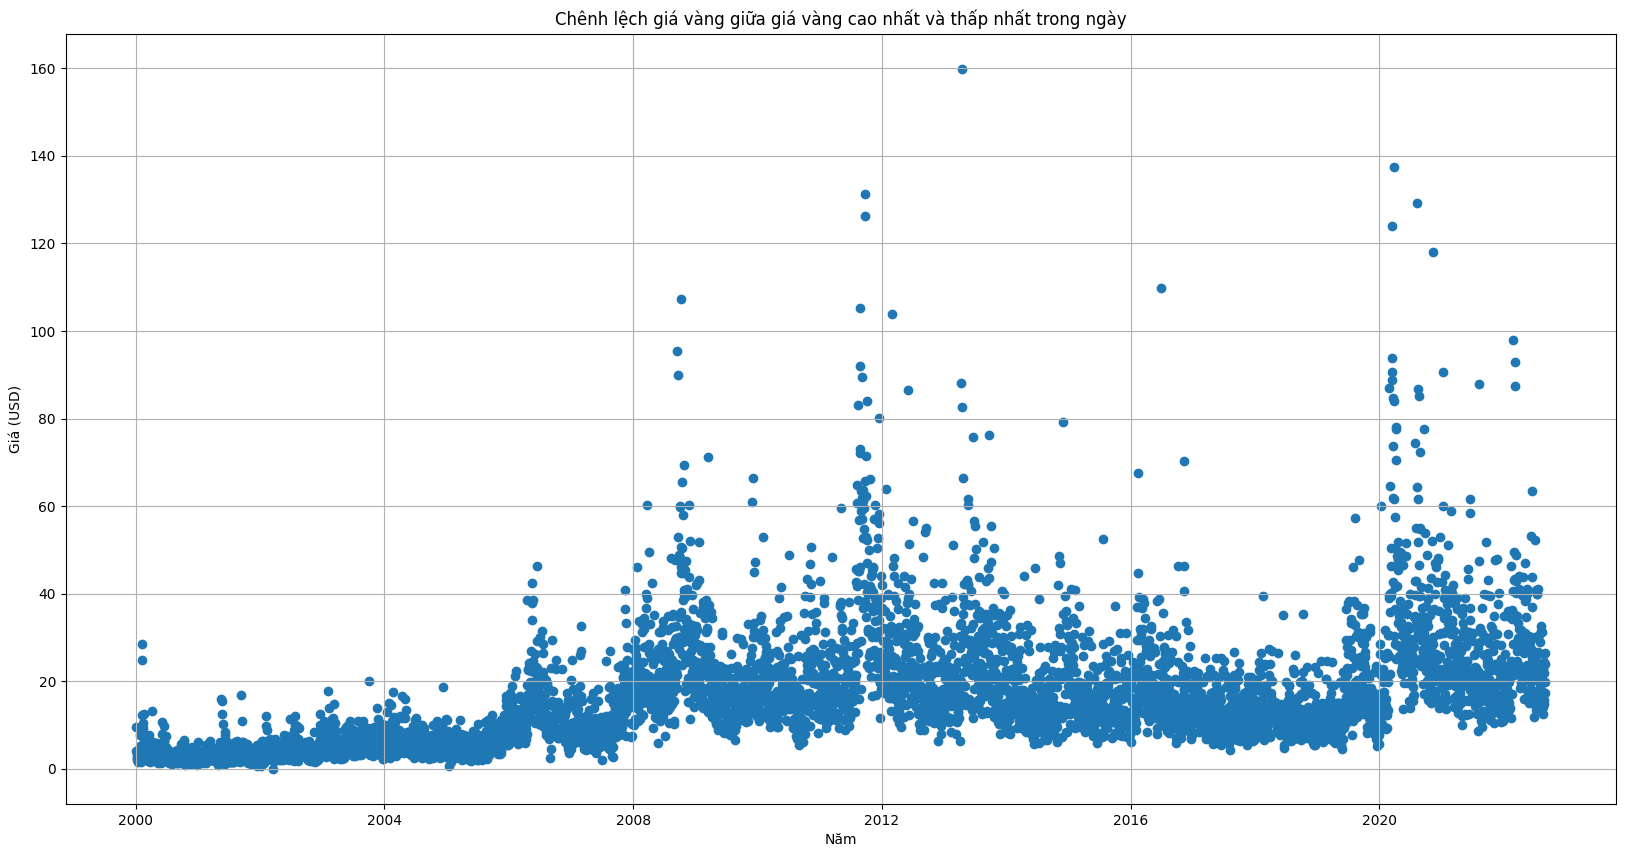

In [85]:
# độ chệnh lệch giá vàng cao nhất vs thấp nhất trong ngày trong 4 năm gần đây
df = pd.DataFrame({
    "date" : df_gold["Date"], 
    "diff" : df_gold["High"] - df_gold["Low"]})

#plot time series
fig, plot = plt.subplots( figsize=(20, 10))

plot.scatter(df["date"], df["diff"])
plot.grid(True)
plot.set_title("Chênh lệch giá vàng giữa giá vàng cao nhất và thấp nhất trong ngày")
plot.set_xlabel("Năm")
plot.set_ylabel("Giá (USD)")
plt.show()

<b>Nhận xét</b>
-   Qua quan sát, có thể thấy chênh lệch giữa giá vàng cao nhất và thấp nhất trong ngày từ 2000 đến 2022 đều tăng, tăng cao nhất là 160 USD vào năm 2013.
-   Từ năm 2000 đến khoảng năm 2007 đa số có sự tăng nhẹ, phần lớn dưới 20 USD.
-   Từ năm 2008 đến năm 2015, chênh lệch giữa giá vàng cao nhất và thấp nhất trong ngày tăng biến động, tăng mạnh nhất vào các năm 2008-2009, 2012-2014. Trong đó, cao nhất là chênh lệch 160 USD vào năm 2013.
-   Từ năm 2016 đến cuối năm 2019, có sự ổn định giữa giá vàng cao nhất và thấp nhất trong ngày, phần lớn chênh lệch dao động trong khoảng 10-20 USD.
-   Từ đầu năm 2020 đến giữa năm 2022, chênh lệch giữa giá vàng cao nhất và thấp nhất trong ngày cũng tăng biến động (đa số từ 10-60 USD) và chênh lệch cao nhất là 137 USD vào năm 2020.

<b>Bối cảnh thế giới:</b>
-   Trong giai đoạn 2008-2009, khủng hoảng tài chính thế giới đã gây ra nhiều làn sóng mạnh ảnh hưởng đến giá vàng thế giới. Thị trường vàng đã lên xuống khá thất thường trước bối cảnh bất ổn của thị trường tài chính, từ đó dẫn đến sự chênh lệch mạnh giữa giá vàng cao nhất và thấp nhất trong ngày.
-   Trong giai đoạn 2011-2012 đánh dấu "cơn sốt" vàng, giá vàng thế giới biến động rất bất thường trong xu thế liên tục tăng cao, thậm chí giá niêm yết thay đổi tới hàng chục lần trong một ngày nên khoảng cách chênh lệch giữa giá mua và giá bán vàng cũng thường xuyên ở mức cao. Mức chênh lệch thông thường vài chục ngàn đồng một lượng khi thị trường tương đối ổn định trong thời gian ngắn thường xuyên bị đẩy lên tới vài trăm ngàn đồng khi thị trường liên tục biến động bất thường.
-   Giai đoạn 2020-2022, giá vàng diễn biến phức tạp là do thế giới vẫn tiếp tục đối mặt với nhiều nhân tố bất ổn, cả về kinh tế lẫn địa chính trị như căng thẳng Mỹ - Iran; cuộc đàm phán thương mại Mỹ - Trung vẫn chưa rõ ràng; đặc biệt là dịch bệnh do Covid-19 khiến thị trường vàng có xu hướng tăng - giảm giá liên tục.

### 3. Quan sát sự chênh lệch giữa giá mở cửa và giá đóng cửa trong ngày.

**Mục đích đề xuất ý tưởng:** Tìm hiểu, quan sát và nhận xét về sự chênh lệch giữa giá mở cửa và giá đóng cửa trong ngày.

**Các trường dữ liệu liên quan:** Open, Close.

**Biểu đồ biểu diễn và tính phù hợp của biểu đồ với các trường dữ liệu:**<br>
Biểu đồ được sử dụng để trực quan là **Scatter**.<br>
Tính phù hợp của biểu đồ với các trường dữ liệu được ở chổ:
-   Thể hiện sự phân tán độ chênh lệch của giá mở cửa và giá đóng cửa.
-   Dễ dàng quan sát được các chênh lệch cao nhất và đưa ra nhận xét.
-   Quan sát được sự biến động
-   Đơn giản, trực quan với lượng dữ liệu lớn.

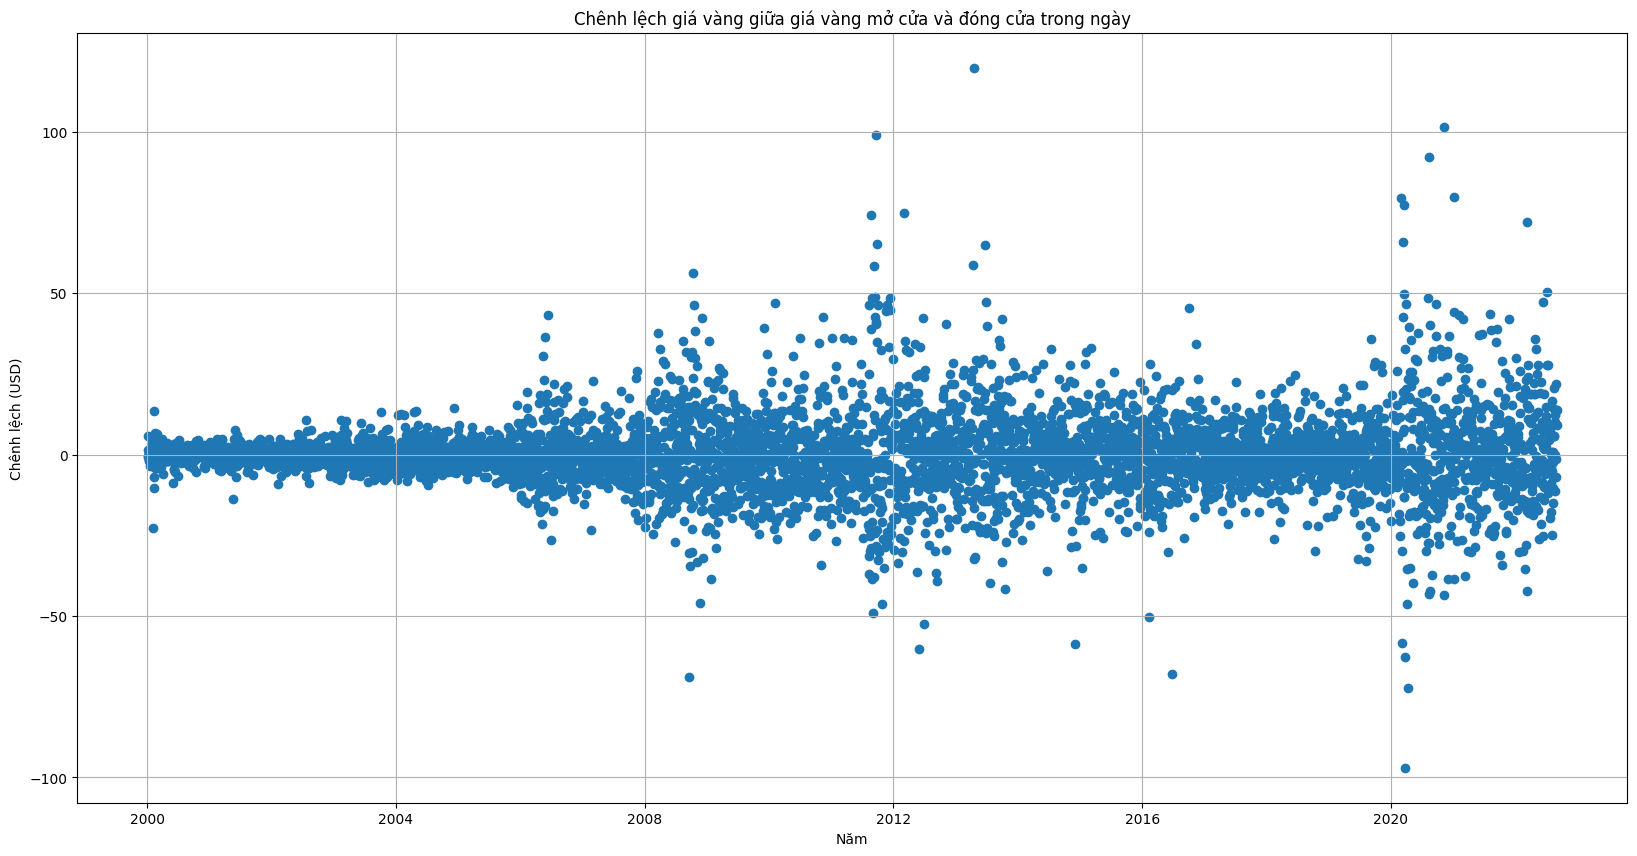

In [86]:
# # chênh lệch giữa giá vàng mở cửa và giá vàng đóng cửa
df = pd.DataFrame({
    "date" : df_gold["Date"], 
    "diff" : df_gold["Open"] - df_gold["Close"]})

#plot time series
fig, plot = plt.subplots( figsize=(20, 10))
# col = np.where(df['diff'] < 0 ,'darkgreen', 'skyblue')

plot.scatter(df["date"], df["diff"])
plot.set_title("Chênh lệch giá vàng giữa giá vàng mở cửa và đóng cửa trong ngày")
plot.set_xlabel("Năm")
plot.set_ylabel("Chênh lệch (USD)")
plot.grid(True)
plt.show()

<b>Nhận xét</b>
-   Qua quan sát, có thể thấy chênh lệch giữa giá vàng mở cửa và đóng cửa trong ngày từ 2000 đến 2022 đều tăng, chênh lệch cao nhất là 120 USD vào năm 2013.
-   Số lượng chênh lệch dương khá cân bằng với số lượng chênh lệch âm, chênh lệch dương cho thấy giá vàng đóng cửa thấp hơn so với giá vàng mở cửa. Điều này cho thấy sự sụt giảm của giá vàng trong ngày đó, sụt giảm nhiều hay ít phụ thuộc vào nhiều yếu tố tác động như thị trường, nguồn cung, tỷ giá, khủng hoảng tài chính, dịch bệnh, ... 
-   Qua từng giai đoạn:
    -   Từ năm 2000 đến khoảng năm 2007 đa số chênh lệch có sự tăng nhẹ.
    -   Từ năm 2008 đến năm 2015, chênh lệch giữa giá vàng mở cửa và đóng cửa trong ngày tăng biến động, tăng mạnh nhất vào các năm 2008-2009, 2012-2014. 
    -   Năm 2011-2013 chứng kiến giai đoạn biến động giá vàng kỷ lục khi chênh lệch giá vàng mở cửa và đóng cửa đạt kỷ lục là 120 USD.
    -   Từ năm 2016 đến cuối năm 2019, có sự ổn định giữa giá vàng mở cửa và đóng cửa, phần lớn chênh lệch dao động trong khoảng 10-20 USD.
    -   Từ đầu năm 2020 đến giữa năm 2022, chênh lệch giữa giữa giá vàng mở cửa và đóng cửa trong ngày cũng tăng biến động (phần lớn từ 10-50 USD) và chênh lệch cao nhất là 100 USD vào năm 2020.

<b>Bối cảnh thế giới:</b>
-   Năm 2008-2009, khủng hoảng tài chính toàn cầu đã ảnh hưởng đến giá vàng mở cửa và đóng cửa, gây ra biến động giá vàng bất thường.
-   Năm 2011-2013, do bất ổn định thị trường tài chính toàn cầu như căng thẳng giữa Mỹ-Iran, chính sách của ngân hành trung ương, thị trường tài chính hồi phục sau khủng hoảng, sụt giảm nhu cầu ở thị trường Ấn Độ và Trung Quốc đã ảnh hưởng đến giá vàng. 
-   Năm 2020-2022, do tác động mạnh mẽ của đại dịch Covid-19 vào kinh tế thế giới dẫn đến sự biến động của thị trường tài chính từ đó giá vàng cũng bất ổn theo.

### 1.3 Sử dụng biểu đồ Candlestick để biểu diễn giá vàng qua từng thời điểm


**Biểu đồ**: Biểu đồ hình nến (Candlestick Chart), hay còn thường được gọi là biểu đồ nến Nhật, mô hình nến, là một loại biểu đồ tài chính dùng để mô tả chuyển động giá của đối tượngn dựa trên mô hình giá trong quá khứ.

**Lý do dùng**: Biểu đồ hình nến có ý nghĩa vô cùng to lớn trong giao dịch tài chính nói chung và mua bán vàng nói riêng. Chỉ một biểu đồ đơn thuần sẽ cung cấp rất nhiều thông tin quan trọng về thị trường.

**Ý nghĩa biểu đồ**:
- Trục X nằm ngang biểu thị thời gian. Thời gian hiển thị ở trục X phụ thuộc vào khung thời gian được lựa chọn để phân tích. Nếu khung thời gian là 1D thì mỗi cây nến sẽ biểu thị mức giá dao động trong 1 ngày. 1H thì mỗi cây nến sẽ biểu thị mức giá giao động trong 1 giờ.
- Trục Y thẳng đứng biểu thị giá. Các mức giá biến động trong một khoảng thời gian nhất định.
- Theo dataset về giá vàng đã chọn, việc lựa chọn biểu đồ hình nến là phù hợp, cho phép người dùng nhận ra các xu hướng, mức độ biến động và sự thay đổi trong giá cả của việc giao dịch vàng trong suốt khoảng thời gian nhất định. Bằng cách sử dụng biểu đồ hình nến, người sử dụng có thể dễ dàng so sánh giá trị cao và giá trị thấp của giá vàng trong một ngày giao dịch cụ thể.

**Trường dữ liệu:** Date, Open, High, Low

In [87]:
df = df_gold
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()



**Nhận xét:**
- Trong những năm đầu (2000 - 2005) , giá vàng khá ổn định và chỉ tăng từ từ qua từng năm cho thấy thị trường không biến động nhiều.
- Trong 5 năm tiếp theo (2005 - 2010), đã có sự tăng trưởng mạnh và biến động không ngừng khi đồ thị có sự lên xuống không cố định, thể hiện rõ nhất là từ năm 2008 trở đi. Điều này như là một tín hiệu cho thấy thị trường sắp có sự bùng nổ trong tương lai gần.
- Từ những năm 2010 trở đi, giá vàng đã có sự thay đổi mạnh mẽ khi vào năm 2011 đã có lúc giá vàng gần chạm tới 2000 USD, tăng trưởng gấp 1,5 lần so với những năm 2009 - 2010. Tuy nhiên, về sau thì giá vàng cũng có xu hướng giảm đi nhưng vẫn có những lần đạt giá trị cao. Xong vào tầm giữa năm 2013 - 2020, giá vàng tuy có sự tăng giảm liên tục nhưng không thể vượt quá 1500 USD nhưng cũng không ít hơn 1000 USD.
- Xong, sang những năm 2020 trở đi, giá vàng lại tăng mạnh liên tục, đây cũng là khoảng thời gian dịch bệnh bùng phát, cho thấy yếu tố số lượng vàng giao dịch đạt con số to lớn, khiến giá vàng được đẩy lên cao.
- Tóm lại, trong suốt 23 năm, giá vàng đã có những biến động mạnh mẽ, bùng nổ, thể hiện phần nào tình hình kinh tế, tài chính Mỹ qua từng giai đoạn, giúp người xem có những cái nhìn tổng quát hơn về một nền kinh tế lớn trên thế giới.

In [88]:
from ipywidgets import interact, DatePicker

### 1.4. Trực quan giá vàng theo thời gian bằng biểu đồ đường + kỹ thuật Manipulate View

**Biểu đồ:** Đường

**Lý do dùng:**
- Biểu đồ đường biểu diễn tốt, dễ hiểu sự thay đổi của giá vàng theo thời gian.
- Dữ liệu của về giá vàng của chúng ta rất lớn, nó là dữ liệu từ năm 2001-2022. Với lượng dữ liệu khổng lồ này thì quá lớn để xem hết một lần. Vì thế, để thuận tiện cho việc xem xét từng khoảng thời gian cụ thể từ đó có thể phân tích được giá vàng một cách tốt hơn, ta sẽ trực quan hoá giá khi `Close` theo thời gian. Thêm vào đó, ta sẽ thêm một chức năng đó là điều chỉnh được thời gian để xem xét dữ liệu một cách linh hoạt và chi tiết hơn.

In [89]:
df =df_gold

def plot_gold_prices(start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    new_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    plt.figure(figsize=(22, 9))
    sns.lineplot(x = 'Date', y = 'Close', data = new_df)
    plt.ylabel('Price Close (USD)')
    plt.title(f'Gold Prices from {start_date.strftime("%d-%m-%Y")} to {end_date.strftime("%d-%m-%Y")}')
    plt.show()


start = DatePicker(description = 'Start Date', value = df['Date'].min())
end = DatePicker(description = 'End Date', value = df['Date'].max())

interact(plot_gold_prices, start_date = start, end_date = end)

interactive(children=(DatePicker(value=Timestamp('2000-01-04 00:00:00'), description='Start Date', step=1), Da…

<function __main__.plot_gold_prices(start_date, end_date)>

**Nhận xét:**

Sau khi trực quan hoá, ta thấy giá vàng có sự biến động rất nhiều trong hơn 20 năm qua. Với việc xem được nhiều khoảng thời gian khác nhau có thể giúp ta thấy được đặc trưng của từng thời kì biến động giá vàng. Qua đó có thể xem xét dựa trên nhiều mốc thời gian khác nhau.

Để cho thấy được lợi ích của việc này, ta sẽ phân tích một chút giá vàng ở một mốc thời gian nào đó.

Những năm đầu của biểu đồ ta thấy giá vàng có xu hướng tăng nhưng rất chậm. Nhưng đến năm 2008, ta thấy giá vàng biến động rất mạnh. Và sau đợt biến động này thì giá vàng tăng rất nhanh. Ta sẽ phân tích giá vàng ở thời điểm này để xem có gì đặt biệt.

Ta sẽ chỉnh thời gian của biểu đồ từ thành từ tháng 1-2007 đến tháng 12-2009. 

- Giá vàng biến động rất ít ở năm 2007. 
- Vào cuối năm 2007 và đầu năm 2008 giá vàng tăng rất mạnh nhưng sau đó lại giảm rất sâu vào cuối năm.
- Đến năm 2009, giá vàng tăng trường một cách mạnh mẽ và đạt chỉnh ở cuối năm 2009 với giá 1200 USD.

Sự biến động mạnh mẽ này của giá vàng là không bình thường và nguyên nhân nào đã gây ra nó.

Sau khi tìm hiểu thì đây là cuộc khủng hoảng kinh tế diễn ra ở Mĩ. 
- Giá vàng tăng ở thời gian đầu nhưng đã giảm mạnh do vào nữa sau năm 2008 thì cuộc khủng hoảng đã lan rộng dẫn đến giá vàng giảm mạnh.
- Đầu năm 2009, chính phủ Mỹ đã thực hiện các chính sách kích thích kinh tế và lạm phát. Do đó, giá vàng tăng mạnh ở thời kì này.

### 1.5. Giá vàng và khối lượng giao dịch thời Covid-19

**Ý tưởng:**

Trong 20 năm qua, ngoài cuộc khủng hoảng kinh tế kể trên, ta cũng còn một thời kì mà giá vàng cũng bị ảnh hưởng rất nhiều đó là Đại dịch covid 19.

<b>"Volume và giá vàng có ảnh hưởng đến nhau. Khi giá vàng tăng, thường có sự quan tâm và tham gia của các nhà đầu tư, do đó volume có thể tăng lên. Ngược lại, khi giá vàng giảm, các nhà đầu tư có thể giảm sự quan tâm và tham gia vào thị trường vàng, do đó volume cũng có thể giảm xuống." </b>  Chúng ta cùng xem thử những điều này có đúng với khoảng thời gian đại dịch không ??

Để thấy rõ được tác động của đại dịch ta sẽ phân tích dữ liệu trước dịch cho đến khi dịch ổn định (từ đầu năm 2019 đến cuối năm 2021). Ta sẽ trực quan hoá giá vàng (Close) và lượng vàng giao dịch (Volume) trong khoảng thời gian này để thấy được sự biến động.

**Biểu đồ:** Đường
**Trường dữ liệu:** Date, Close, Volume

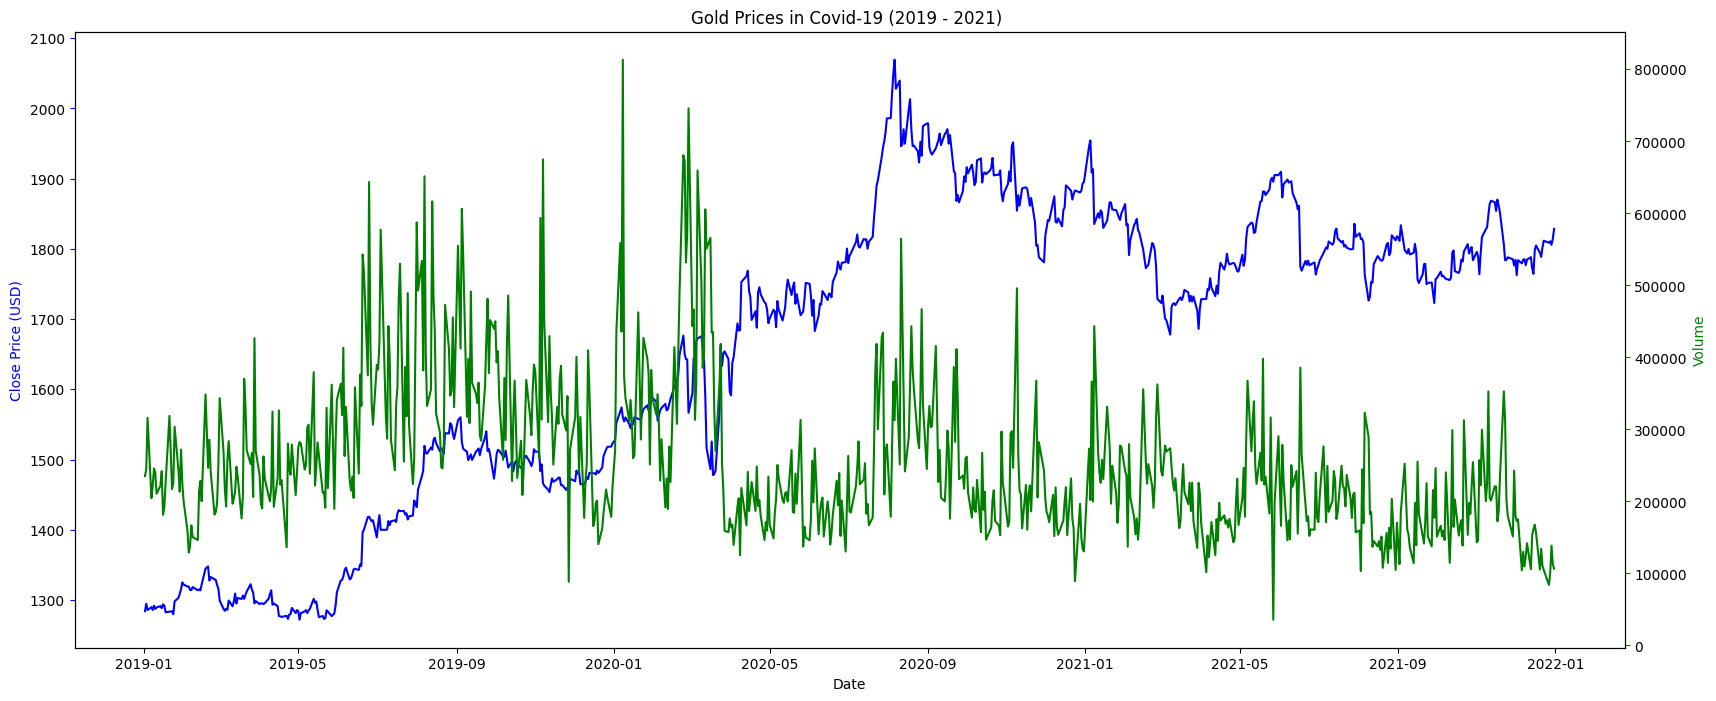

In [90]:
new_df = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2021-12-31')]

fig, ax1 = plt.subplots(figsize=(20, 8))

ax1.plot(new_df['Date'], new_df['Close'], color = 'blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)', color = 'blue')
ax1.tick_params('y', color = 'blue')

ax2 = ax1.twinx()

ax2.plot(new_df['Date'], new_df['Volume'], color = 'green')
ax2.set_ylabel('Volume', color = 'green')
ax2.tick_params('y', color = 'green')
plt.title(f'Gold Prices in Covid-19 (2019 - 2021) ')
plt.show()

Sau khi trực quan hoá dữ liệu trên, ta thấy được một số điều đặc biệt ở dữ liệu này:
- Ở năm 2019, lượng giao dịch và gía vàng có biến động nhưng không mạnh. Khi giá vàng tăng ở nữa năm sau thì số lượng giao dịch cũng tăng. Có vẻ giả thuyết đã nêu ở trên khá đúng với năm 2019.
- Tiếp ở năm 2020, đây là năm đại dịch bùng phát. Ở những tháng đầu năm, giá vàng và lượng giao dịch đều tăng mạnh. Nhưng sau đó giá vàng tiếp tục tăng mạnh nhưng lượng giao dịch lại giảm xuốg mức rất thấp. Trong đại dịch diễn ra thì tình hình kinh tế thế giới biến đồng rất mạnh, do đó các nhà đầu tư đã mua vàng để tích trữ thay cho những tài sản khác. Do đó giá vàng tăng mạnh nhưng số lượng giao dịch không cao.
-  Ở năm 2021, giá vàng đã có dấu hiệu giảm nhẹ và biến động ít hơn nhưng lượng giao dịch vẫn không tăng mạnh. Có lẻ nguyên nhân là do tình hình dịch bệnh lúc này đã được kiểm soát nhưng chưa thật sự triệt.

Qua sự phân tích ở trên, ta có thể thấy rằng vàng là một trong những tài sản an toàn được nhiều nhà đầu tư đánh giá cao. Nhờ đó khi có biến cố gì lớn tác động đến nền kinh tế thì giá vàng và lượng giao dịch sẽ có sự biến động rất mạnh.

### 1.6. Phân tích giá mở cửa từ năm 2000 đến năm 2022


**Biểu đồ:** Đường

**Lý do:** Biểu diễn tốt được giá theo thời gian

**Mục đích:** Xem sự biến động của giá mở cửa từ năm 2000 đến 2022

C:\Users\HP\AppData\Local\Temp\ipykernel_6556\817636798.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



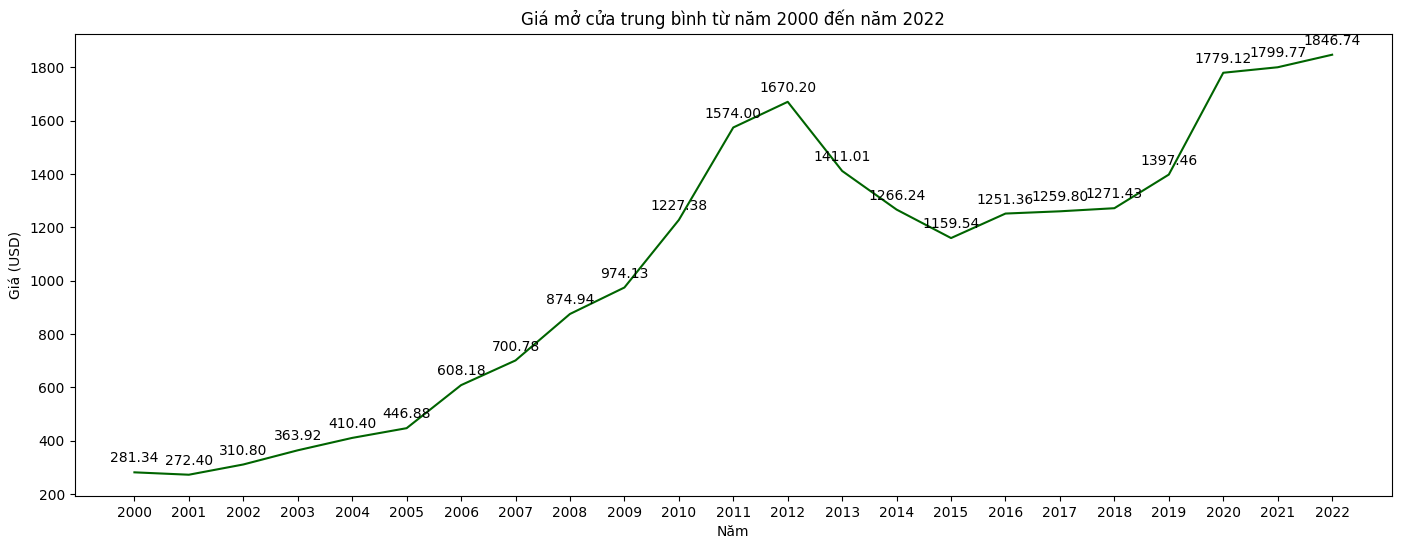

In [91]:
# Tính giá vàng mở cửa trung bình theo từng năm
df = df_gold
open=df[['Date', 'Open']]
open['Date'] =  df['Date'].dt.strftime('%Y').astype(str)
open_by_year = open.groupby(by = 'Date', axis=0, as_index=False).mean()

# Trực quan bằng biểu đồ đường để thấy sự thay đổi theo từng năm
plt.figure(figsize=(17,6))
sns.lineplot(x='Date', y='Open', data=open_by_year, color='darkgreen')
plt.xlabel("Năm")
plt.ylabel("Giá (USD)")
plt.title("Giá mở cửa trung bình từ năm 2000 đến năm 2022")
for x,y in zip(open_by_year['Date'], open_by_year['Open']):
    
    label = "{:.2f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset pixels", 
                 xytext=(0,10), 
                 ha='center')
plt.show()

**Nhận xét**
- Nhìn chung, giá vàng mở cửa trung bình có xu hướng tăng qua từng năm, nhưng tăng không đồng đều.
- Giá vàng mở cửa trung cao nhất ở năm 2022 (1846.74 USD), thấp nhất năm 2001 (272.40 USD)
- Giá vàng mở cửa trung bình tăng đều từ năm 2001 đến năm 2012, sau đó đến năm 2015 giảm dần, và tăng đều trở lại từ năm 2016 đến năm 2022.
- Giá vàng mở cửa trung bình tăng mạnh nhất là năm 2020 (tăng 381.66 USD so với năm 2019) và giảm mạnh nhất là năm 2013 (giảm 259.19 USD so với năm 2012)

### 1.7. Phân tích số lượng giao dịch trung bình theo từng năm

**Biểu đồ:** Cột

**Lý do dùng:** Dễ dàng so sánh và đánh giá số lượng giao dịch của các năm

**Mục đích:** So sánh và nhìn nhận khối lượng giao dịch trung bình qua các năm

**Trường dữ liệu:** Date, Volume

C:\Users\HP\AppData\Local\Temp\ipykernel_6556\4141990516.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



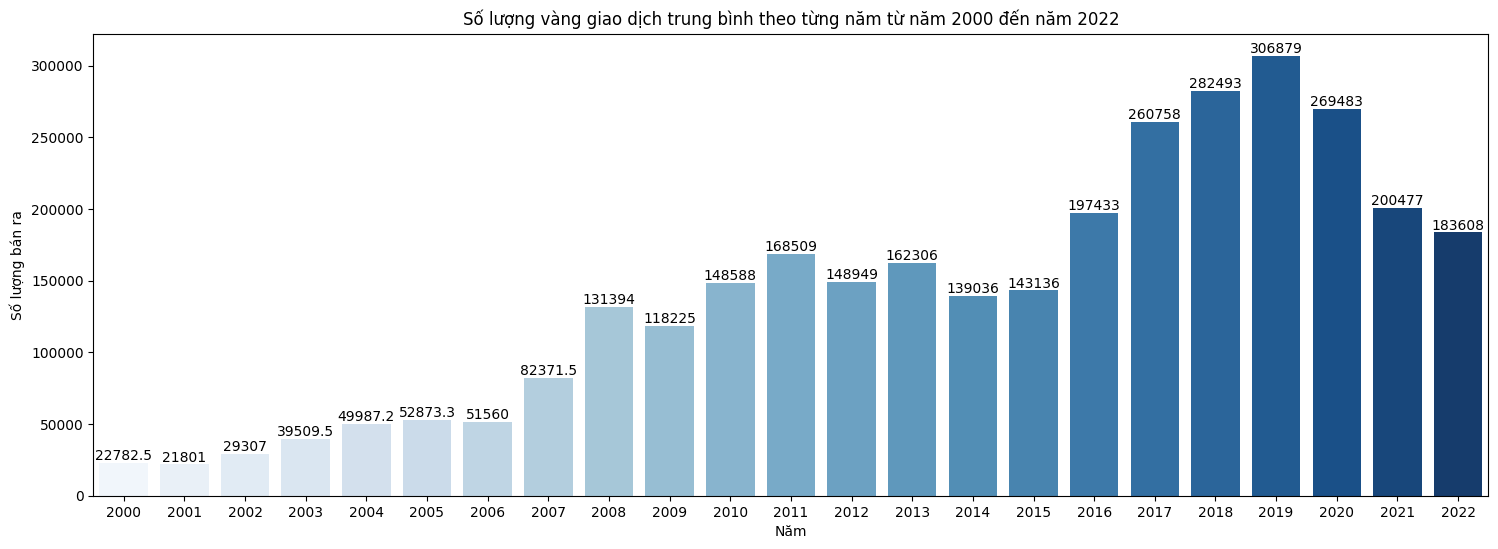

In [92]:
# Tính số lượng trung bình bán ra theo từng năm
vol=df[['Date', 'Volume']]
vol['Date'] =  df['Date'].dt.strftime('%Y').astype(str)
vol_by_year = vol.groupby(by = 'Date', axis=0, as_index=False).mean()
vol_by_year

# Trực quan bằng biểu đồ cột đứng để thấy sự thay đổi theo từng năm
plt.figure(figsize=(18,6))
bp = sns.barplot(x='Date', y='Volume', data=vol_by_year, palette='Blues')
plt.bar_label(bp.containers[0], label_type='edge')
plt.xlabel("Năm")
plt.ylabel("Số lượng bán ra")
plt.title("Số lượng vàng giao dịch trung bình theo từng năm từ năm 2000 đến năm 2022")
plt.show()

**Nhận xét:**
- Nhìn chung, số lượng giao dịch vàng trung bình có xu hướng tăng qua từng năm, nhưng tăng không đồng đều.
- Số lượng giao dịch vàng trung bình cao nhất ở năm 2019 (306879 giao dịch), thấp nhất năm 2001 (21801 giao dịch)
- Số lượng giao dịch vàng trung bình tăng mạnh nhất là năm 2017 (tăng 63325 giao dịch so với năm 2016) và giảm mạnh nhất là năm 2021 (giảm 69006 giao dịch so với năm 2020)
- 3 năm gần nhất có xu hướng giảm có thể do những ảnh hưởng không tốt từ thị trường tác động tới việc giao dịch vàng.
- Năm 2007 có tỉ lệ tăng cao nhất (tăng 59.76% so với năm trước), năm 2021 có tỉ lệ giảm cao nhất (giảm 25,61% so với năm trước)

### 1.8. Tìm mối tương quan giữa giá mở cửa và số lượng giao dịch

**Biểu đồ:** Đường (Giá mở cửa), Cột (Số lượng giao dịch)

**Mục đích:** Ta có thể thấy được sự thay đổi của giá vàng cũng như khối lượng giao dịch qua các năm, từ đó tìm hiểu xem liệu có mối quan hệ giữa khối lượng giao dịch và giá vàng hay không. 

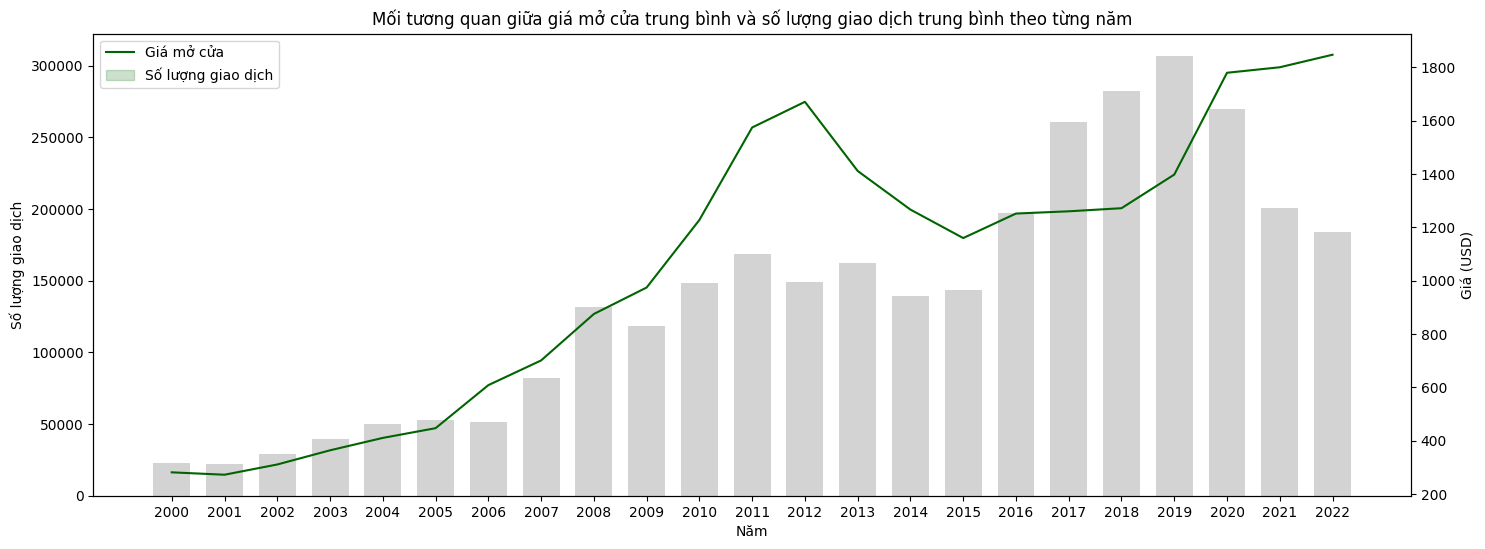

In [93]:
#Tạo biểu đồ
fig, plot1 = plt.subplots(figsize=(17,6))
plot2 = plot1.twinx()

sns.barplot(x='Date', y='Volume', data=vol_by_year, color='lightgrey', ax=plot1, label='Số lượng giao dịch', width=0.7)
sns.lineplot(x='Date', y='Open', data=open_by_year, color='darkgreen', ax=plot2, label='Giá mở cửa')

# Chỉnh sửa biểu đồ
plot1.set_xlabel("Năm")
plot1.set_ylabel("Số lượng giao dịch")
plot2.set_ylabel("Giá (USD)")
plt.title("Mối tương quan giữa giá mở cửa trung bình và số lượng giao dịch trung bình theo từng năm")
plt.legend(['Giá mở cửa', 'Số lượng giao dịch'])
plt.show()

**Nhận xét:**
- Từ năm 2000 đến năm 2010, mức giá mở cửa tăng và số giao dịch vàng theo năm tỉ lệ thuận.
- Trong giai đoạn 2010 - 2012, mức giá mở cửa có tăng nhanh chóng nhưng số giao dịch theo năm vẫn giữ mức ổn định, không tăng quá nhiều và cũng không giảm quá nhiều.
- Số lượng giao dịch tăng đều ở giai đoạn 2014 - 2019, giai đoạn này mức giá mở cửa ở mức ổn định và không tăng quá nhiều. 
- 3 năm gần nhất có xu hướng giảm và giảm mạnh nhất vào năm 2021. Nhận thấy rằng ở năm 2020 mức giá mở cửa tăng mạnh và có xu hướng không giảm, cộng thêm đó là dịch bệnh COVID-19 diễn ra làm các hoạt động kinh tế bị trì trệ, mức độ tiêu thụ hàng hoá bị giảm và vàng không là ngoại lệ.

### 1.9. Xem số lượng giao dịch theo từng tháng trong năm

**Biểu đồ:** Heatmat

**Mục đích:** Ta có thể xem được rằng qua các năm liệu có khoảng thời gian nào là khối lượng giao dịch nhiều hơn so với các khoảng còn lại không. Sử dụng heatmat giúp ta nhận biết được qua các năm thì các tháng có khối lượng giao dịch ra sao.

Ta lọc ra các cột năm, tháng và tính volume theo trung bình

In [94]:
by_month = df[['Date', 'Volume']]


by_month['Year'] = by_month['Date'].dt.year
by_month['Month'] = by_month['Date'].dt.month

by_month_avg = by_month.groupby(by = ['Year', 'Month'], axis=0, as_index=False).mean()
by_month_avg['Volume'] = by_month_avg['Volume'].round(decimals=0)


C:\Users\HP\AppData\Local\Temp\ipykernel_6556\1119957267.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_6556\1119957267.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_6556\1119957267.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fun

In [95]:
pvt = by_month_avg.pivot('Month', 'Year', 'Volume')

C:\Users\HP\AppData\Local\Temp\ipykernel_6556\756323339.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



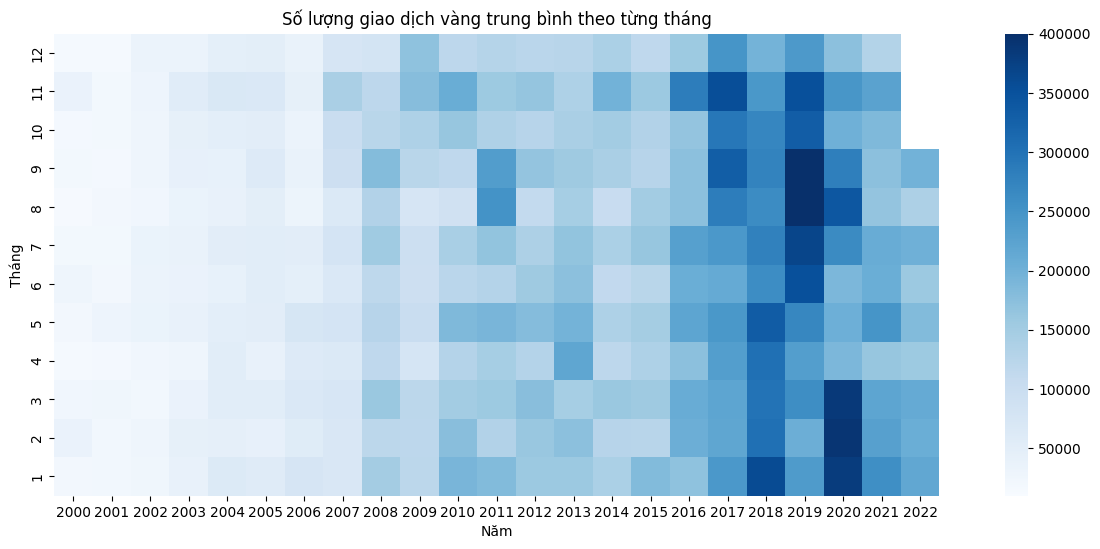

In [96]:
# Vẽ biểu đồ
plt.figure(figsize=(17,6))
hm = sns.heatmap(pvt, square=True, vmin=10000, vmax=400000, cmap='Blues')
hm.set(xlabel='Năm', ylabel='Tháng', title='Số lượng giao dịch vàng trung bình theo từng tháng')

hm.invert_yaxis() # Đảo chiều thanh đứng lại hiển thị từ dưới lên từ tháng 1 đến tháng 12
plt.show()


**Nhận xét**
- Nhìn chung, số lượng giao dịch sẽ tập trung nhiều nhất vào 3 tháng đầu năm (tháng 1, tháng 2, tháng 3) và 3 tháng cuối năm (tháng 10, tháng 11, tháng 12)
- Số lượng giao dịch được ghi nhận nhiều nhất vào 3 tháng đầu năm 2020 và tháng 8, tháng 9 năm 2019.

### 1.10 Tô màu dữ liệu

**Cách dùng:** Ta tô màu cho bảng dataframe, với những giá trị lớn thì tô màu đậm, giá trị nhỏ thì tô màu nhạt.
**Mục đích:** Dễ quan sát thẳng ở trên Dataframe những giá trị nổi bật.

Ta sẽ in ra 20 ngày cuối trong bảng dataframe và tô màu

In [97]:
cm = sns.light_palette("red", as_cmap=True)
df_gold.tail(30).style.background_gradient(cmap=cm)

,Date,Open,High,Low,Close,Volume,Currency
5672,2022-07-22 00:00:00,1717.200000,1738.300000,1711.700000,1727.400000,200622,USD
5673,2022-07-25 00:00:00,1726.300000,1734.600000,1712.900000,1719.100000,160719,USD
5674,2022-07-26 00:00:00,1717.900000,1726.400000,1711.500000,1717.700000,147367,USD
5675,2022-07-27 00:00:00,1715.200000,1739.600000,1709.100000,1719.100000,144865,USD
5676,2022-07-28 00:00:00,1751.400000,1774.400000,1750.400000,1769.200000,192863,USD
5677,2022-07-29 00:00:00,1773.100000,1784.600000,1768.400000,1781.800000,140666,USD
5678,2022-08-01 00:00:00,1782.500000,1792.500000,1774.300000,1787.700000,133742,USD
5679,2022-08-02 00:00:00,1789.200000,1805.000000,1776.000000,1789.700000,174165,USD
5680,2022-08-03 00:00:00,1777.300000,1789.400000,1770.000000,1776.400000,151734,USD
5681,2022-08-04 00:00:00,1782.100000,1812.000000,1779.400000,1806.900000,153292,USD


**Nhận xét:**
- Dữ liệu từ ngày **2022-07-22** đến ngày **2022-09-01**, ta có thể nhìn thấy ở nữa đầu tháng 8, giá vàng có sự tăng trưởng khi mà ở vùng này thì màu đậm hơn so với các vùng khác. Tuy nhiên, khối lượng giao dịch vàng ở khoảng thời gian này lại không quá nhiều. Ta thấy rằng những khi giá vàng có mức giá thấp thì khối lượng giao dịch mới nhiều. Điều này có thể theo xu hướng "mua khi giá thấp" của các nhà đầu tư.

### 1.11 Decomposition of Time Series

Decomposition là một phương pháp được sử dụng để phân rã chuỗi thời gian ra thành các thành phần khác nhau gồm:
- Trend: xu hướng dài hạn của chuỗi thời gian, có thể tăng hoặc giảm theo thời gian.
- Seasonal: biểu thị các chu kỳ lặp lại trong chuỗi thời gian
- Residual: phần còn lại sau khi đã loại đi Trend và Seasonal


Ta sẽ phân tích ở trên thuộc tính Close

In [98]:
#Đặt Date là index
df_gold.set_index('Date',inplace=True)

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_gold['Close'], model='additive', period=365)

#### 1. Trend

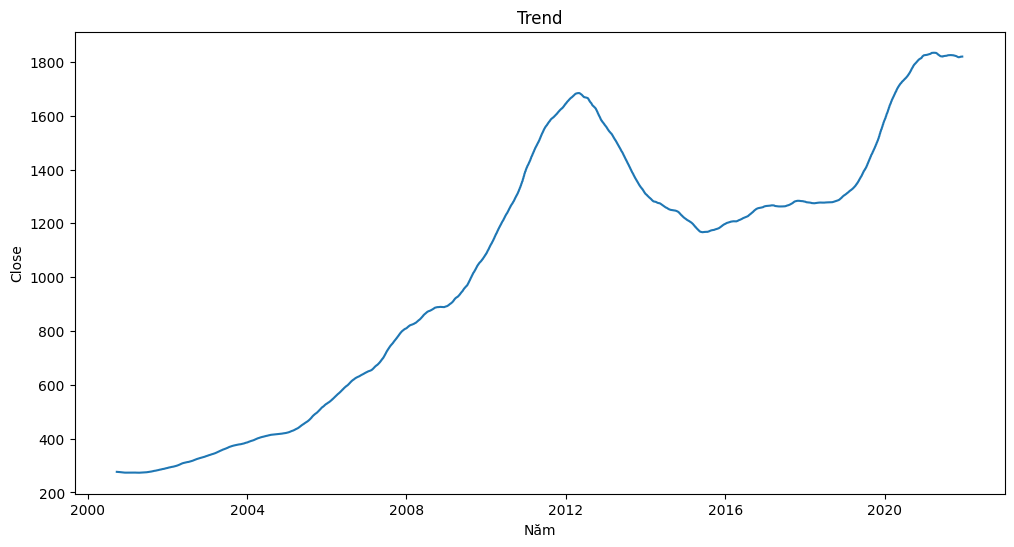

In [100]:
plt.figure(figsize=(12,6))
plt.plot(decomposition.trend)

plt.xlabel('Năm')
plt.ylabel('Close')
plt.title('Trend')
plt.show()

**Nhận xét**

Ta thấy từ năm 2000 đến năm 2012, giá vàng có xu hướng tăng mạnh, tuy nhiên sau đó thì nó giảm xuống và có dấu hiệu chững lại vào năm 2016 trở đi. Đến năm 2019, giá vàng lại tăng mạnh trở lại và đạt đỉnh, nhưng nó lại có xu hướng trững lại và giảm nhẹ vào năm 2021.

#### 2. Seasonal

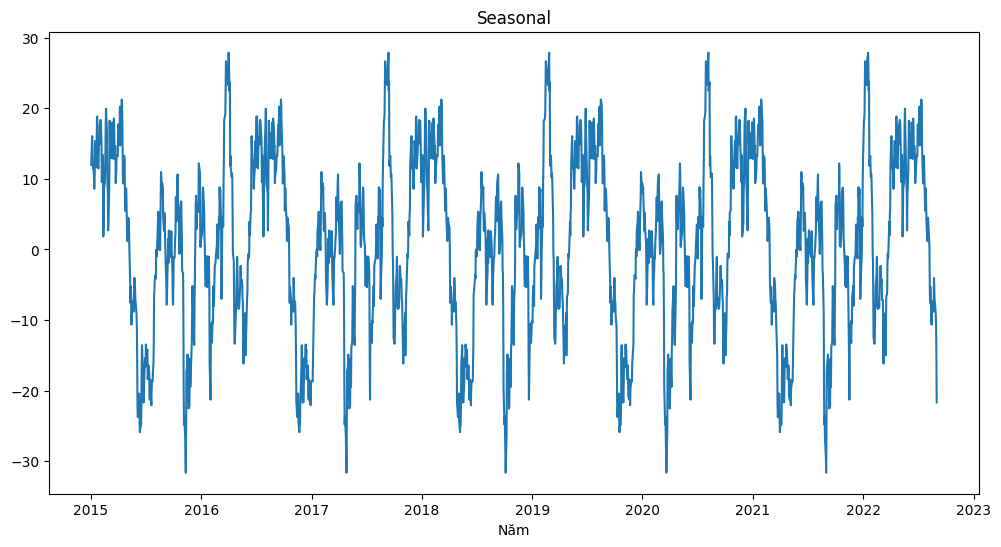

In [101]:
plt.figure(figsize=(12,6))
plt.plot(decomposition.seasonal['2015':'2022'])

plt.xlabel('Năm')

plt.title('Seasonal')
plt.show()

**Nhận xét**

Ta thấy rằng trong một năm, giá vàng giảm mạnh ở đầu năm, sau đó tăng trở lại vào khoảng tháng 4 nhưng lại giảm tiếp vào giữa năm. Khoảng tháng 7,8, giá vàng tăng mạnh và đạt đỉnh, sau đó tiếp tục giảm và tăng mạnh vào khoảng cuối năm.

#### 3. Residual

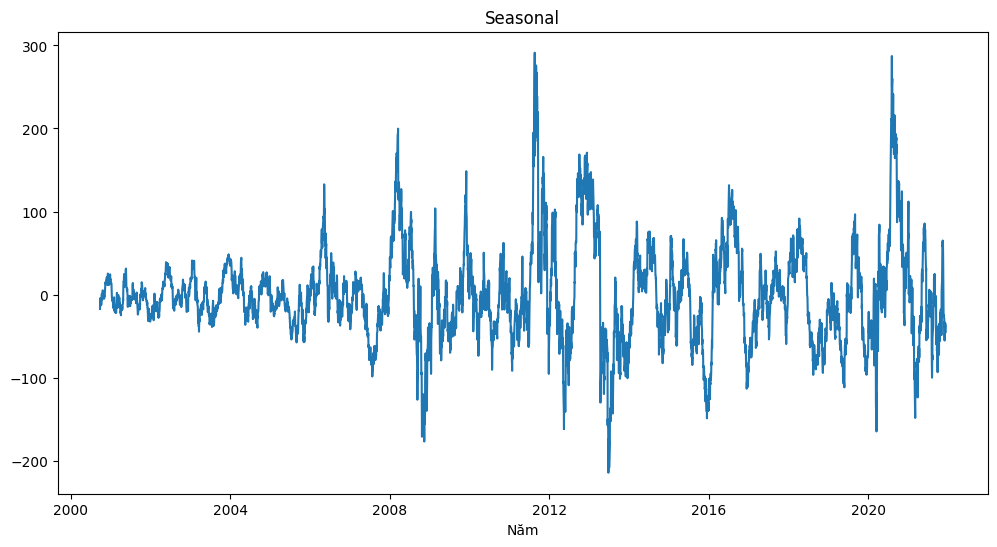

In [102]:
plt.figure(figsize=(12,6))
plt.plot(decomposition.resid)

plt.xlabel('Năm')

plt.title('Seasonal')
plt.show()

### 1.12 Độ tương quan giữa các thuộc tính

**Mục tiêu:** Xem mức độ tương quan giữa các thuộc tính liên quan đến giá vàng: Open, High, Low, Close. Liệu chúng có tương quan mạnh với nhau không hay là không ảnh hưởng đến nhau.

**Biểu đồ**:
- **Heatmap**: dùng màu sắc để biểu thị độ tương quan của các thuộc tính, giúp ta dễ nhận biết thuộc tính nào có độ tương quan mạnh với nhau
- **Pairplot**: vẽ các biểu đồ scatter plot theo dạng ma trận để ta quan sát mối quan hệ giữa các biến với nhau và đường chéo chính để xem sự phân bố giá trị của các thuộc tính, xem thử sự phân bố có khác nhau hay không. 

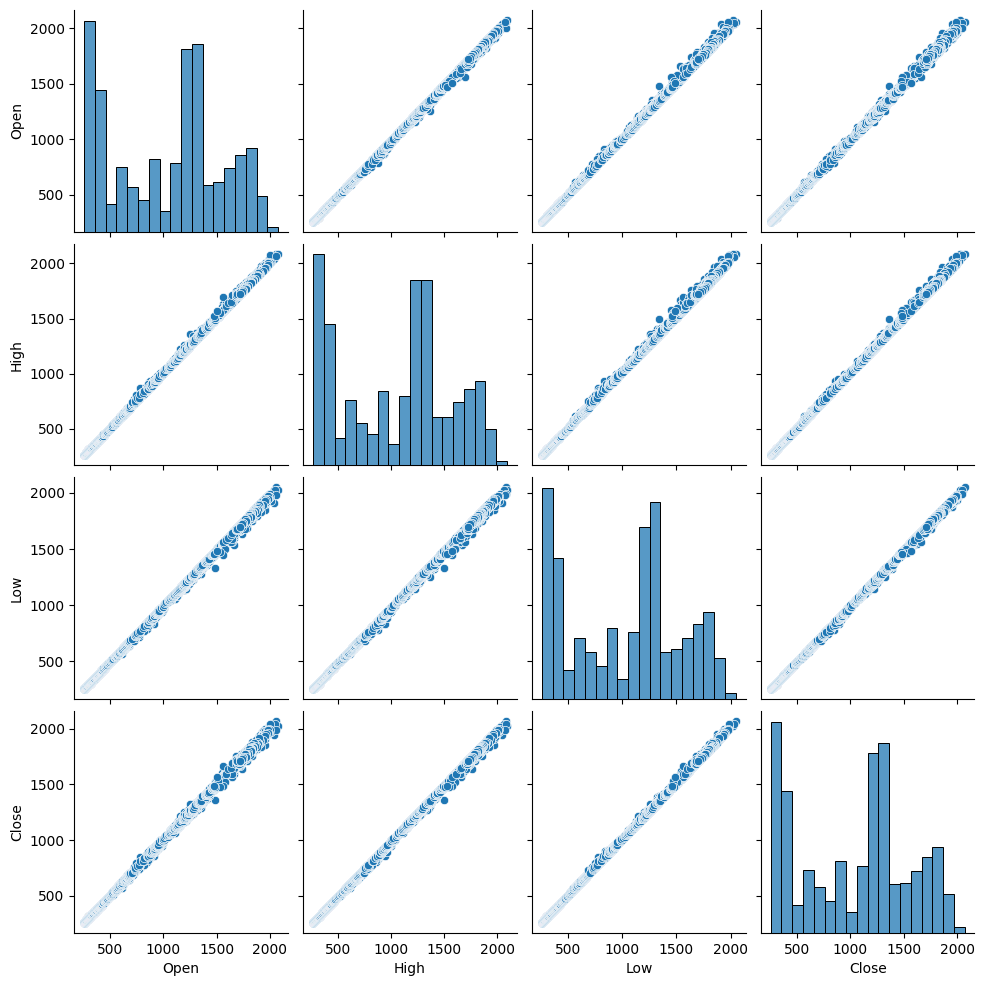

In [103]:

sns.pairplot(df_gold[['Open', 'High', 'Low', 'Close']])
plt.show()

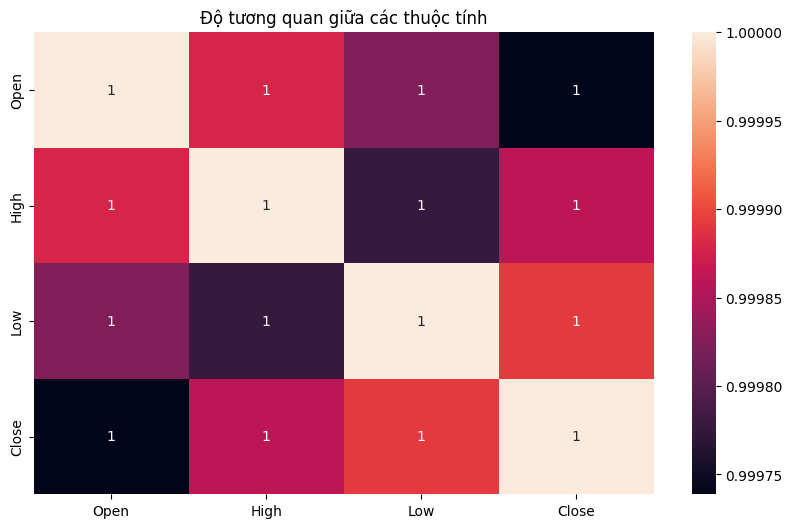

In [104]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gold[['Open', 'High', 'Low', 'Close']].corr(), annot=True)
plt.title('Độ tương quan giữa các thuộc tính')
plt.show()

**Nhận xét:**
- Các thuộc tính có độ tương quan cao gần như bằng 1, điều này dễ hiểu vì giá vàng trong một ngày giao động không quá nhiều, dẫn đến 4 chỉ số này trong một ngày sẽ có giá trị gần bằng nhau. Suy ra nếu giá vàng ngày hôm sau tăng thì cả 4 chỉ số này cùng tăng, nếu giảm thì cả 4 cùng giảm/
- Cũng vì điều này nên ta thấy sự phân bố dữ liệu của các thuộc tính này gần như là tương đương nhau
- Ở biểu đồ Heatmap, các màu sắc không thể hiện được gì nhiều khi giá trị về độ tương quan chênh nhau không quá nhiều và gần như bằng 1

### 1.13 Daily Return

Daily return trong giá vàng là tỷ lệ thay đổi giá vàng trong một ngày so với giá vàng của ngày trước đó. 

**Mục đích:** Ta sẽ trực quan chỉ số này theo thời gian để xem sự thay đổi giá vàng giữa các ngày sẽ ra sao

**Biểu đồ:** Đường vì đây là biểu đồ thể hiện tốt sự thay đổi của giá trị theo thời gian.

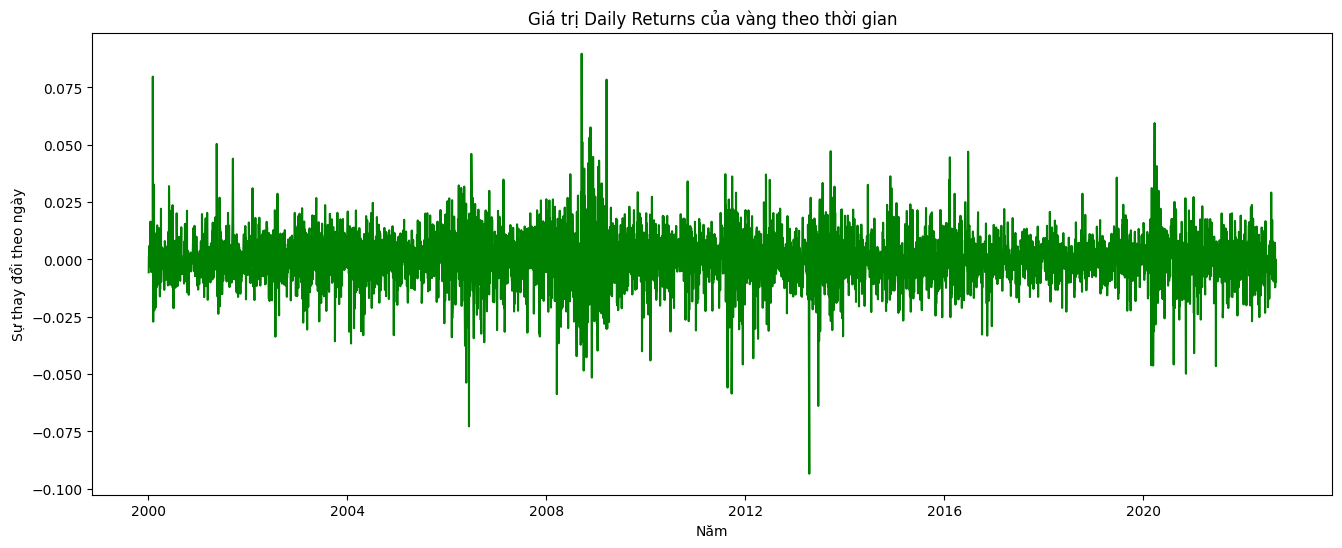

In [105]:
#Tính daily return bằng pct_change
daily_return = df['Close'].pct_change().dropna()


plt.figure(figsize=(16, 6))
plt.plot(daily_return,color = 'green')

plt.xlabel('Năm')
plt.ylabel('Sự thay đổi theo ngày')
plt.title('Giá trị Daily Returns của vàng theo thời gian')

plt.show()

**Nhận xét:**
- Đa số giá vàng đều chỉ thay đổi so với ngày hôm trước trong khoảng 2.5%.
- Một số thời điểm giá vàng thay đổi mức lớn hơn 7,5%, tiêu biểu như:
    - Đầu năm 2000, giá vàng tăng hơn 7,5% so với ngày trước, nguyên nhân có thể là do sự sụp đổ của nhiều loại tài sản khác khiến mọi người mất niềm tin. Người dân lúc này tin vàng là một loại tài sản an toàn để đầu tư và có khả năng giữ giá tốt trong thị trường kinh tế hỗn loạn.
    - Giữa năm 2006, giá vàng giảm hơn 6%, vào thời điểm đó, thị trường chứng khoán đang tăng mạnh, dẫn đến sự quan tâm cho vàng bị giảm đi, hơn nữa vàng cũng được sản xuất mạnh ở thời gian này -> Cung tăng -> Giá giảm.
    - Khoảng tháng 9/2008, giá vàng tăng mạnh, hơn 8%. Đây là thời điểm bùng nổ của cuộc khủng hoảng kinh tế năm 2008, tài chính và bất động sản sụp đổ dẫn đến việc người dân lại tin tưởng vào vàng trở lại. Đồng USD giảm cũng khiến cho vàng tăng giá vì giờ phải mất nhiều USD hơn cho một đơn vị vàng.
    - Giữa năm 2013, giá vàng giảm hơn 8%, nguyên nhân là do sự phục hồi của thị trường giá chứng khoán toàn cầu khiến sức hút của vàng giảm. Ngoài ra đồng USD tăng giá trị mạnh nên khiến cũng khiến cho giá trị của vàng giảm đi nhiều.
    - Đầu năm 2020, giá vàng tăng 6&, nguyên nhân là do sự bùng nổ của dịch COVID-19 làm ảnh hưởng tiêu cực đến nền kinh tế, thị trường chứng khoán bị ảnh hưởng khá nhiều, nên người dân tin tưởng rằng vàng là một mức đầu tư hợp lý để giữ giá vào thời điểm này. 

Ta vẽ thêm biểu đồ Histogram để thấy rõ sự phân bố của giá trị này. 

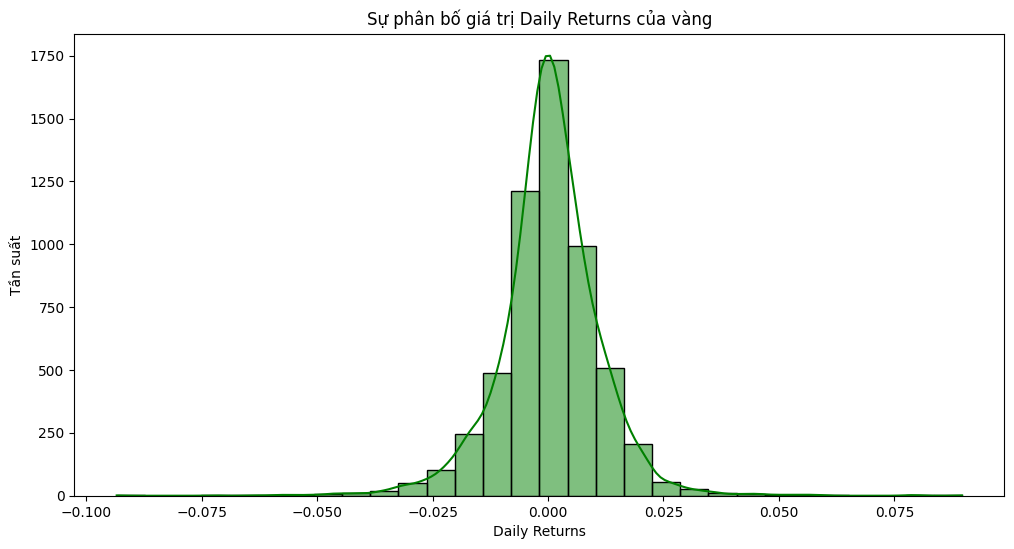

In [106]:

plt.figure(figsize=(12, 6))


sns.histplot(daily_return,kde=True, bins=30, color='green')

plt.xlabel('Daily Returns')
plt.ylabel('Tần suất')
plt.title('Sự phân bố giá trị Daily Returns của vàng')
plt.show()

**Nhận xét**

Khi vẽ biểu đồ phân phối, ta thấy rõ ràng hơn ràng sự thay đổi của giá vàng nằm tập trung chủ yếu ở mức 2.5%. Chứng tỏ giá vàng thường không có sự biến động quá lớn theo ngày.

## 2.Sử dụng mô hình LSTM để dự đoán giá vàng

### 2.1 Tạo dữ liệu

- Ta sẽ dự đoán giá trị của vàng thông qua thuộc tính Close.
- Mô hình LSTM sẽ dựa vào những giá trị trong quá khứ để đưa ra dự đoán trong tương lai, vì thế ta chỉ cần biết ngày và giá trị của thuộc tính Close vào ngày đó.

In [107]:
data_build = pd.DataFrame(df_gold['Close'])

Như đã nói ở trước, mô hình LSTM sẽ dựa vào giá trị vàng của những ngày trước để đưa ra dự đoán, vậy ta sẽ đưa vào giá trị của 10 ngày trước đó để dự đoán ngày tiếp theo. Ta sẽ xây dựng dataset với thuộc tính là giá trị của giá vàng trong 10 ngày liền kề.

Vậy, **input** của chúng ta sẽ là giá trị của vàng 10 ngày trước đó và **output** là giá vàng của ngày đó.

In [108]:
def create_data_for_lstm(df, lookback):
    
    for i in range(1,lookback+1):
        df['Close(t-{})'.format(i)] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

In [109]:

look_back = 10
data_build_set = create_data_for_lstm(data_build,look_back)
#Chỉ lấy giá trị để build mô hình
data_build_value = data_build_set.values


### 2.2 Chia input, output

In [110]:
#Ta sẽ lấy cột đầu tiên (giá vàng trong ngày đó) làm output, các thuộc tính còn lại là input
X = data_build_value[:,1:]
y = data_build_value[:,0]
X.shape, y.shape

((5683, 10), (5683,))

### 2.3 Scale dữ liệu

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler =  MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_label = scaler.fit_transform(y.reshape(-1,1))

### 2.4 Chia tập train và test

Ta sẽ chia dữ liệu ra 2 tập train/test với tỷ lệ 9:1

In [113]:
#Lấy index để chia
index_split = int(len(X) * 0.90)

X_train = scaled_data[:index_split]
X_test = scaled_data[index_split:]

y_train = scaled_label[:index_split]
y_test = scaled_label[index_split:]

Ta sẽ đổi shape của X theo dạng (số lượng mẫu, số lookback,số thuộc tính) để phù hợp với mô hình LSTM lúc train.

In [114]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### 2.5 Xây dựng mô hình và đánh giá

In [115]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

Ta sẽ xây dựng mạng neural với lớp đầu là 50 units, lớp 2 là 50 units và lớp output là 1 unit

In [116]:
model=Sequential()

model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
160/160 [==============================] - 6s 10ms/step - loss: 0.0184
Epoch 2/30
160/160 [==============================] - 2s 9ms/step - loss: 2.7323e-04
Epoch 3/30
160/160 [==============================] - 2s 10ms/step - loss: 2.6114e-04
Epoch 4/30
160/160 [==============================] - 2s 10ms/step - loss: 2.6456e-04
Epoch 5/30
160/160 [==============================] - 2s 10ms/step - loss: 2.4453e-04
Epoch 6/30
160/160 [==============================] - 2s 10ms/step - loss: 2.3954e-04
Epoch 7/30
160/160 [==============================] - 1s 9ms/step - loss: 2.4046e-04
Epoch 8/30
160/160 [==============================] - 2s 10ms/step - loss: 2.2592e-04
Epoch 9/30
160/160 [==============================] - 2s 11ms/step - loss: 2.1674e-04
Epoch 10/30
160/160 [==============================] - 2s 11ms/step - loss: 2.1934e-04
Epoch 11/30
160/160 [==============================] - 2s 14ms/step - loss: 2.0193e-04
Epoch 12/30
160/160 [==============================] - 2s 

Ta sẽ dùng mô hình để dự đoán trên tập test

In [117]:
y_pred = model.predict(X_test)
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1))


18/18 [==============================] - 0s 4ms/step


Ta sẽ tính chỉ số RMSE để đánh giá mô hình

In [118]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE:', rmse)

Test RMSE: 36.06738497344728


Ta có sai số giá vàng dự đoán là khoảng 32, tức là khi dự đoán thì giá vàng thường sẽ nằm trong khoảng +- 32 so với giá vàng dự đoán

### 2.6 Trực quan hoá kết quả

Ta sẽ tạo các dataframe để trực quan kết quả

In [119]:
#Dataframe cho tập train và test
df_train = data_build[:index_split]
df_test = data_build[index_split:]

#Dataframe cho tập predict
df_predict = pd.DataFrame(data = y_pred,index = df_test.index,columns=['Close'])

Ta trực quan kết quả

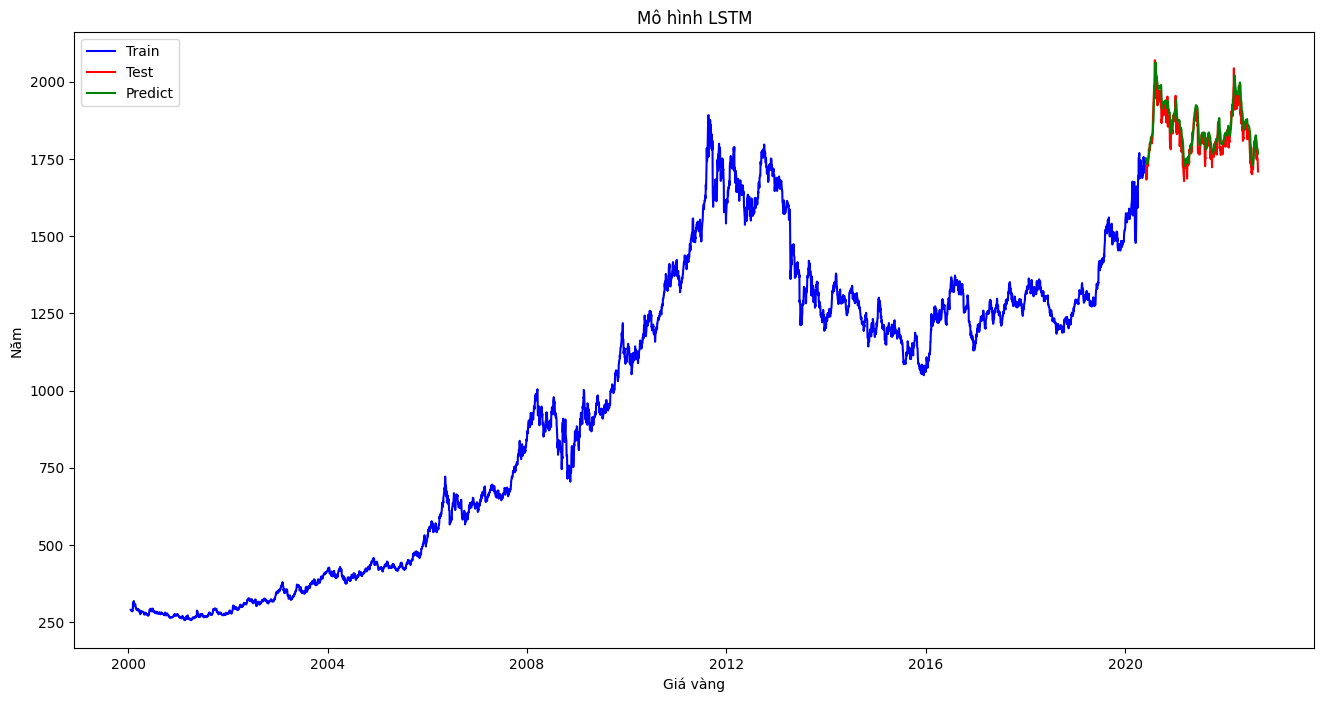

In [120]:
plt.figure(figsize=(16,8))
plt.plot(df_train['Close'],color = 'blue', label = 'Train')
plt.plot(df_test['Close'], color = 'red',label = 'Test')
plt.plot(df_predict['Close'],color = 'green',label = 'Predict')

plt.title('Mô hình LSTM')
plt.xlabel('Giá vàng')
plt.ylabel('Năm')
plt.legend()
plt.show()


**Nhận xét:** 

Dựa vào biểu đồ, ta có thể thấy đường Predict và đường Test có vẻ khá tương đồng với nhau, biểu diễn tốt được xu hướng của giá vàng. Chứng tỏ mô hình đã đưa ra kết quả khá là chính xác so với thực tế.